**Importing dependencies**

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline

In [9]:
data = pd.read_csv("mnist_train.csv")

In [10]:
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
a = data.iloc[3,1:].values #extracted data

In [12]:
a = a.reshape(28,28).astype("uint8")   #reshaping - unit8 (size of pic)

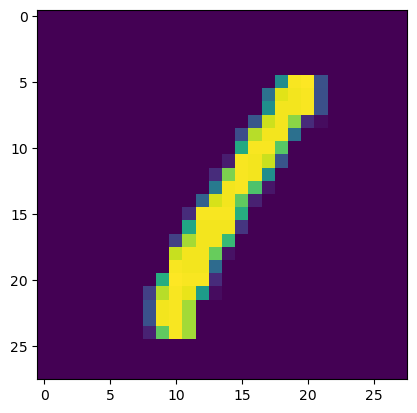

In [13]:
plt.imshow(a)

In [14]:
#preparing the data
# separating labels and data values
df_x = data.iloc[:,1:]
df_y = data.iloc[:,0]

In [15]:
# creating test and train 
x_train, x_test, y_train, y_test= train_test_split(df_x, df_y, test_size=0.2, random_state= 4)

In [16]:
x_train.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
20379,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53032,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30510,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
508,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
y_train.head()

20379    4
53032    4
27005    7
30510    8
508      1
Name: label, dtype: int64

In [19]:
# call rf classifier
rf =RandomForestClassifier(n_estimators =100)

In [20]:
# fit the model
rf.fit(x_train, y_train)

RandomForestClassifier()

In [21]:
# prediction on test data
pred = rf.predict(x_test)

In [22]:
pred

array([2, 7, 6, ..., 6, 4, 2], dtype=int64)

In [33]:
accuracy_score(y_test, pred)

0.9700833333333333

97% accuracy

#### XGBOOST 

In [37]:
# XGBClassifier
xgb_classifier = XGBClassifier()

In [39]:
xgb_classifier.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [40]:
y_pred = xgb_classifier.predict(x_test)

In [41]:
accuracy_score(y_test, y_pred)

0.9763333333333334

Accuracy : 98 % approx with xgboost